<a href="https://colab.research.google.com/github/boufik/Google-Colab-Projects/blob/main/Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

There are several NumPy, SciPy, and pandas correlation functions and methods that you can use to calculate these coefficients. You can also use Matplotlib to conveniently illustrate the results:

* Pearson’s coefficient measures linear correlation
* Spearman and Kendall coefficients compare the ranks of data.

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

# Data

In [ ]:
x1 = np.arange(10, 20)
y1 = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])
x2 = np.arange(20, 30)
y2 = np.array([50, 40, 42, 30, 32, 27, 25, 21, 19, 20])
x3 = np.arange(0, 40)
y3 = np.random.randint(low=-100, high=100, size=40)

## 1) Pearson's Coefficient

### a) Numpy - corrcoef() for the corr. matrix

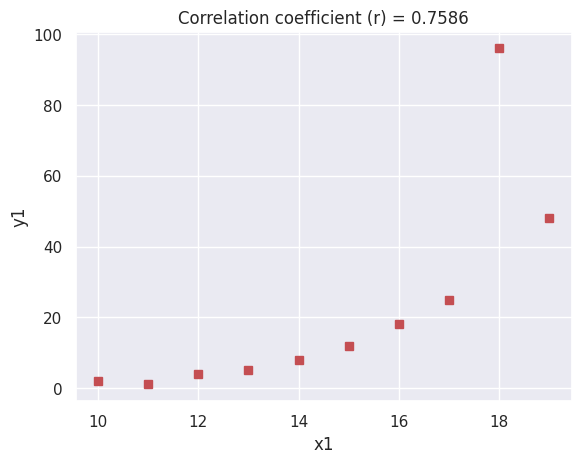


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Correlation matrix ----> <class 'numpy.ndarray'>
[[1.         0.75864029]
 [0.75864029 1.        ]]

*   Correlation coefficient:   r = 0.7586
* Determination coefficient: r^2 = 57.55 %
* This means that 57.55 % of the variance in one variable (p.e. 'x1') can be explained
by the variance in the other one (p.e. 'y1') under a linear model
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [ ]:
corr_matrix1 = np.corrcoef(x1, y1)
r1 = corr_matrix1[0, 1]
plt.plot(x1, y1, 'rs')
plt.xlabel("x1")
plt.ylabel("y1")
plt.title(f"Correlation coefficient (r) = {r1:.4}")
plt.show()

print(f"\n{90 * '~'}\nCorrelation matrix ----> {type(corr_matrix1)}\n{corr_matrix1}")
print(f"\n*   Correlation coefficient:   r = {r1:.4}")
print(f"* Determination coefficient: r^2 = {100*r1**2:.4} %")
print(f"* This means that {100*r1**2:.4} % of the variance in one variable (p.e. 'x1') can be explained\nby the variance in the other one (p.e. 'y1') under a linear model\n{90 * '~'}")

### b) pandas - corr() for the corr. matrix

In [ ]:
xb = pd.Series(x1)
yb = pd.Series(y1)
zb = pd.Series(np.random.randint(low=0, high=100, size=10))                   # For experimentation purposes: We care about (x, y) only
dfb = pd.DataFrame({'xb': xb, 'yb': yb, 'zb': zb})
corr_matrixb = dfb.corr()
rb_1st = xb.corr(yb, method='pearson')
rb_2nd = yb.corr(xb, method='pearson')

print(f"{90 * '~'}\nDataframe dfb ---> {type(dfb)}\n\n{dfb}\n")
print(f"Correlation matrix ---> {type(corr_matrixb)}\n{corr_matrixb}\n")
print(f"rb (1st way) = {rb_1st:.5}\nrb (2nd way) = {rb_2nd:.5}")
print(f"{90 * '~'}")
print(xb.corr(zb), '\t', yb.corr(zb))

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Dataframe dfb ---> <class 'pandas.core.frame.DataFrame'>

   xb  yb  zb
0  10   2  78
1  11   1  65
2  12   4  53
3  13   5   6
4  14   8   2
5  15  12   2
6  16  18  71
7  17  25  92
8  18  96   3
9  19  48  85

Correlation matrix ---> <class 'pandas.core.frame.DataFrame'>
          xb       yb        zb
xb  1.000000  0.75864  0.009168
yb  0.758640  1.00000 -0.153510
zb  0.009168 -0.15351  1.000000

rb (1st way) = 0.75864
rb (2nd way) = 0.75864
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
0.00916761133166098 	 -0.15351031076671215


### c) scipy.stats - pearsonr() for the corr. coefficient

In [ ]:
rc, p_valuec = scipy.stats.pearsonr(x1, y1)
print(f"rc = {rc:.4}\np-value = {p_valuec:.4}")

result1 = scipy.stats.pearsonr(x1, y1)
dir1 = dir(result1)
dir1 = [elem for elem in dir1 if elem[0] != "_"]

print(f"\n{90 * '~'}\nAttributes of the method 'peasronr()':\n{dir1}\n")
print(f"For this example:\n* Correlation = {result1.correlation:.4}\n* pvalue = {result1.pvalue:.4}\n* Confidence interval = {result1.confidence_interval}")
print(f"{90 * '~'}\n")

rc = 0.7586
p-value = 0.01096

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Attributes of the method 'peasronr()':
['confidence_interval', 'correlation', 'count', 'index', 'pvalue', 'statistic']

For this example:
* Correlation = 0.7586
* pvalue = 0.01096
* Confidence interval = <bound method PearsonRResult.confidence_interval of PearsonRResult(statistic=np.float64(0.7586402890911869), pvalue=np.float64(0.010964341301680851))>
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



### d) scipy.stats - linregress() for more

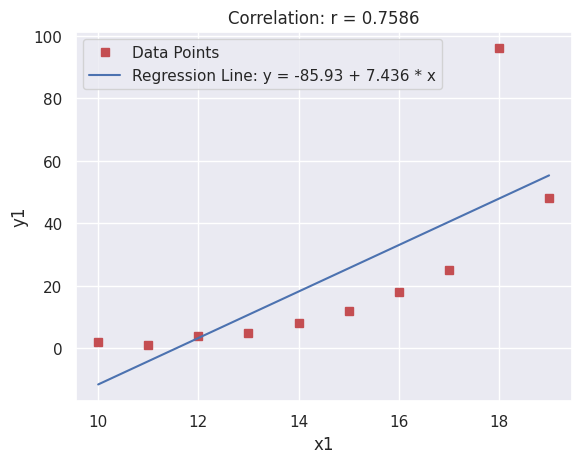

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Attributes of the method 'linregress()':
['count', 'index', 'intercept', 'intercept_stderr', 'pvalue', 'rvalue', 'slope', 'stderr']

For this example:
* Corr: r = 0.7586
*   Slope = 7.436
* Intercept y-point = -85.93
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



In [ ]:
result1 = scipy.stats.linregress(x1, y1)
dir1 = dir(result1)
dir1 = [elem for elem in dir1 if elem[0] != "_"]

y1_regrline = result1.intercept + result1.slope * x1
plt.plot(x1, y1, 'rs', x1, y1_regrline, 'b-')
plt.title(f"Correlation: r = {result1.rvalue:.4}")
plt.xlabel("x1")
plt.ylabel("y1")
plt.legend(["Data Points", f"Regression Line: y = {result1.intercept:.4} + {result1.slope:.4} * x"])
plt.show()

print(f"{90 * '~'}\nAttributes of the method 'linregress()':\n{dir1}\n")
print(f"For this example:\n* Corr: r = {result1.rvalue:.4}\n*   Slope = {result1.slope:.4}\n* Intercept y-point = {result1.intercept:.4}")
print(f"{90 * '~'}\n")

## 2. Spearman Coefficient

### a) scipy.stats - spearmanr() for the corr. coefficient

In [ ]:
r2, p_value2 = scipy.stats.spearmanr(x1, y1)
print(f"r2 = {r2:.4}\np-value = {p_value2:.4}")

result2 = scipy.stats.spearmanr(x1, y1)
dir2 = dir(result2)
dir2 = [elem for elem in dir2 if elem[0] != "_"]

print(f"\n{90 * '~'}\nAttributes of the method 'spearmanr()':\n{dir2}\n")
print(f"For this example:\n* Correlation = {result2.correlation:.4}\n* pvalue = {result2.pvalue:.4}")
print(f"{90 * '~'}\n")

r2 = 0.9758
p-value = 1.468e-06

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Attributes of the method 'spearmanr()':
['correlation', 'count', 'index', 'pvalue', 'statistic']

For this example:
* Correlation = 0.9758
* pvalue = 1.468e-06
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



## 3. Kendall Tau

### a) scipy.stats - kendalltau() for the corr. coefficient

In [ ]:
tau, p_value3 = scipy.stats.kendalltau(x1, y1)
print(f"tau = {tau:.4}\np-value = {p_value3:.4}")

result3 = scipy.stats.kendalltau(x1, y1)
dir3 = dir(result3)
dir3 = [elem for elem in dir3 if elem[0] != "_"]

print(f"\n{90 * '~'}\nAttributes of the method 'kendalltau()':\n{dir3}\n")
print(f"For this example:\n* tau = {result3.correlation:.4}\n* pvalue = {result3.pvalue:.4}")
print(f"{90 * '~'}\n")

tau = 0.9111
p-value = 2.976e-05

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Attributes of the method 'kendalltau()':
['correlation', 'count', 'index', 'pvalue', 'statistic']

For this example:
* tau = 0.9111
* pvalue = 2.976e-05
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



# Examples

In [ ]:
def make_line(x, y):
    result = scipy.stats.linregress(x, y)
    y_regrline = result.intercept + result.slope * x
    plt.plot(x, y, 'rs', x, y_regrline, 'b-')
    plt.title(f"Correlation: r = {result.rvalue:.4}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(["Data Points", f"Regression Line: y = {result.intercept:.4} + {result.slope:.4} * x"])
    plt.show()
    return result

In [ ]:
def pretty_print(result):
    r = result.rvalue
    print(f"\n{35 * '~'}\n   Correlation Coeff:   r = {r:.4}")
    print(f"Determination Coeff = r^2 = {100 * r**2:.4} %")
    print(f"   Slope = {result.slope:.4}")
    print(f"Intercept y-point = {result.intercept:.4}\n{35 * '~'}")

## 1) Negative Correlation

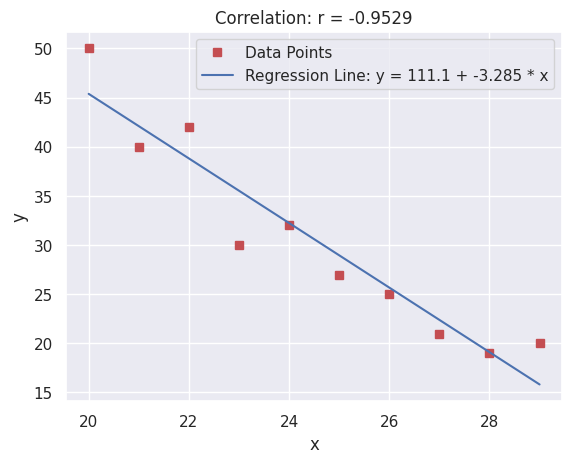


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   Correlation Coeff:   r = -0.9529
Determination Coeff = r^2 = 90.8 %
   Slope = -3.285
Intercept y-point = 111.1
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [ ]:
result = make_line(x2, y2)
pretty_print(result)

## 2) Randomness

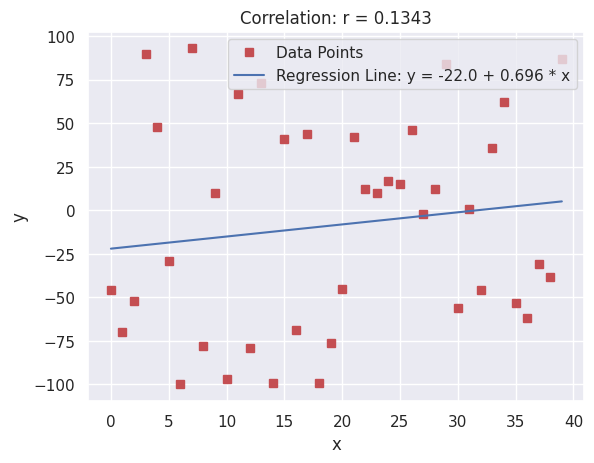


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   Correlation Coeff:   r = 0.1343
Determination Coeff = r^2 = 1.804 %
   Slope = 0.696
Intercept y-point = -22.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [ ]:
result = make_line(x3, y3)
pretty_print(result)

## 3) Heatmap of correlation in a 4D dataset

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Dataframe ---> <class 'pandas.core.frame.DataFrame'>

    x   y   z    w
0  10   2  50  -89
1  11   1  40  130
2  12   4  42  110
3  13   5  30  175
4  14   8  32  105
5  15  12  27  176
6  16  18  25  -37
7  17  25  21  183
8  18  96  19  -87
9  19  48  20   72
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Correlation matrix ---> <class 'pandas.core.frame.DataFrame'>
          x         y         z         w
x  1.000000  0.758640 -0.952885 -0.046380
y  0.758640  1.000000 -0.683132 -0.453192
z -0.952885 -0.683132  1.000000 -0.114192
w -0.046380 -0.453192 -0.114192  1.000000

r_xy = 0.7586
r_xz = -0.9529
r_yz = -0.6831
r_wx = -0.04638
r_wy = -0.4532
r_wz = -0.1142
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



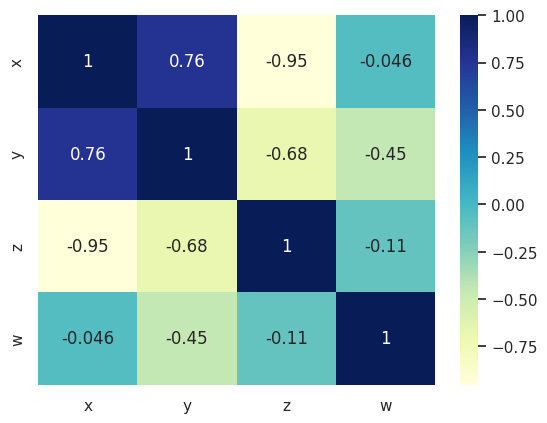

In [ ]:
xx = pd.Series(x1)
yy = pd.Series(y1)
zz = pd.Series(y2)
ww = pd.Series(np.random.randint(low=-200, high=200, size=10))
df = pd.DataFrame({'x': xx, 'y': yy, 'z': zz, 'w' : ww})

corr_matrix = df.corr()
r_xy = xx.corr(yy, method='pearson')
r_xz = xx.corr(zz, method='pearson')
r_yz = yy.corr(zz, method='pearson')
r_wx = ww.corr(xx, method='pearson')
r_wy = ww.corr(yy, method='pearson')
r_wz = ww.corr(zz, method='pearson')

print(f"{90 * '~'}\nDataframe ---> {type(df)}\n\n{df}\n{90 * '~'}\n")
print(f"{90 * '~'}\nCorrelation matrix ---> {type(corr_matrix)}\n{corr_matrix}\n")
print(f"r_xy = {r_xy:.4}\nr_xz = {r_xz:.4}\nr_yz = {r_yz:.4}")
print(f"r_wx = {r_wx:.4}\nr_wy = {r_wy:.4}\nr_wz = {r_wz:.4}")
print(f"{90 * '~'}\n")

sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.show()